# Sentiment Analysis of Customer Reviews

## Project Objective
The goal of this project is to build a natural language processing (NLP) model that automatically classifies customer reviews into **positive**, **neutral**, or **negative** sentiment.  
Sentiment labels are derived from star ratings, and the model is trained using review text data.


## Dataset Overview
The dataset contains customer reviews along with metadata such as review headlines, review body text, and star ratings.  
The review text is used as the primary input feature, while star ratings are used to derive sentiment labels.


## Imports ##

In [108]:
import pandas as pd
import matplotlib.pyplot as plt

## Loading the data ##

In [111]:
df = pd.read_csv(
    "amazon_reviews_us_Furniture_v1_00.tsv",
    sep="\t",
    engine="python",
    on_bad_lines="skip"
)

## Understanding the data ##

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790987 entries, 0 to 790986
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   marketplace        790987 non-null  object
 1   customer_id        790987 non-null  int64 
 2   review_id          790987 non-null  object
 3   product_id         790987 non-null  object
 4   product_parent     790987 non-null  int64 
 5   product_title      790956 non-null  object
 6   product_category   790987 non-null  object
 7   star_rating        790987 non-null  int64 
 8   helpful_votes      790987 non-null  int64 
 9   total_votes        790987 non-null  int64 
 10  vine               790987 non-null  object
 11  verified_purchase  790987 non-null  object
 12  review_headline    790980 non-null  object
 13  review_body        790873 non-null  object
 14  review_date        790987 non-null  object
dtypes: int64(5), object(10)
memory usage: 90.5+ MB


In [116]:
df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,24509695,R3VR960AHLFKDV,B004HB5E0E,488241329,Shoal Creek Computer Desk,Furniture,4,0,0,N,Y,... desk is very study and it i has a beautifu...,This desk is very study and it i has a beauti...,2015-08-31
1,US,34731776,R16LGVMFKIUT0G,B0042TNMMS,205864445,Dorel Home Products Delaney Large Rectangular ...,Furniture,5,0,0,N,Y,Five Stars,Great item,2015-08-31
2,US,1272331,R1AIMEEPYHMOE4,B0030MPBZ4,124663823,Bathroom Vanity Table Jewelry Makeup Desk Benc...,Furniture,5,1,1,N,Y,Five Stars,"Perfect fit for my bedroom, been wanting one s...",2015-08-31
3,US,45284262,R1892CCSZWZ9SR,B005G02ESA,382367578,Sleep Master Ultima Comfort Memory Foam 6 Inch...,Furniture,3,0,0,N,Y,Good enough,"We use this on a trundle bed. So, it does not...",2015-08-31
4,US,30003523,R285P679YWVKD1,B005JS8AUA,309497463,"1 1/4"" GashGuards: Deluxe Rubberized Plastic B...",Furniture,3,0,0,N,N,Gash Gards for daybed,The product is fine...just seemed like it took...,2015-08-31


## Missing Value Analysis ##

In [119]:
pd.concat([
    df.isnull().sum(),
    df.isnull().mean()
], axis=1, keys=["null_count", "null_ratio"]) #ratio=0+1+../(total observation), 1 is true for null and 0 is false for not null


,null_count,null_ratio
marketplace,0,0.000000
customer_id,0,0.000000
review_id,0,0.000000
product_id,0,0.000000
product_parent,0,0.000000
product_title,31,0.000039
product_category,0,0.000000
star_rating,0,0.000000
helpful_votes,0,0.000000
total_votes,0,0.000000


In [121]:
# 1. Drop rows with missing review_body
df = df.dropna(subset=["review_body"])

# 2. Fill missing review_headline (DO NOT overwrite df)
df["review_headline"] = df["review_headline"].fillna("")

# 3. Drop rows with missing star_rating
df = df.dropna(subset=["star_rating"])


Rows missing review text or star ratings were removed, as they cannot be used for supervised sentiment learning. Missing review headlines were retained and replaced with empty strings to preserve review content.

In [124]:
pd.concat([
    df.isnull().sum(),
    df.isnull().mean()
], axis=1, keys=["null_count", "null_ratio"])

,null_count,null_ratio
marketplace,0,0.000000
customer_id,0,0.000000
review_id,0,0.000000
product_id,0,0.000000
product_parent,0,0.000000
product_title,31,0.000039
product_category,0,0.000000
star_rating,0,0.000000
helpful_votes,0,0.000000
total_votes,0,0.000000


Product metadata such as product_title is not helpful for modeling and therefore missing values were left unchanged to avoid unnecessary preprocessing and data loss.

## Target Variable Creation (Sentiment) ##

In [128]:
df = df[df["star_rating"].between(1, 5)]

def label_sentiment(r):
    if r <= 2:
        return "negative"
    elif r == 3:
        return "neutral"
    else:
        return "positive"

df["sentiment"] = df["star_rating"].apply(label_sentiment)
df[['star_rating','sentiment']].head()

,star_rating,sentiment
0,4,positive
1,5,positive
2,5,positive
3,3,neutral
4,3,neutral


Star ratings are used as a proxy for sentiment labels.

## Class Distribution ##

In [131]:
df["sentiment"].value_counts(normalize=True)

sentiment
positive    0.759265
negative    0.147890
neutral     0.092846
Name: proportion, dtype: float64

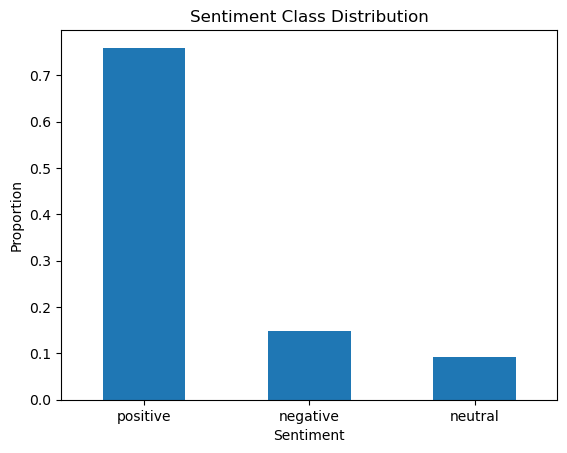

In [134]:
sentiment_dist = df["sentiment"].value_counts(normalize=True)

plt.figure()
sentiment_dist.plot(kind="bar")
plt.ylabel("Proportion")
plt.xlabel("Sentiment")
plt.title("Sentiment Class Distribution")
plt.xticks(rotation=0)
plt.show()


## Text Length Analysis ##

In [137]:
df["review_length"] = df["review_body"].str.len()
df["word_count"] = df["review_body"].str.split().str.len()


In [138]:
df.groupby("sentiment")["word_count"].mean()

sentiment
negative    70.122450
neutral     68.034550
positive    51.732895
Name: word_count, dtype: float64

Negative reviews are longer on average, suggesting users provide more detailed explanations when expressing dissatisfaction. Positive reviews are shorter and more concise, often consisting of brief endorsements.

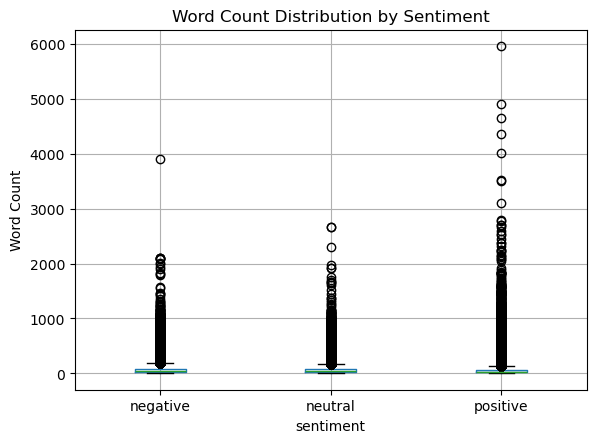

In [142]:
df.boxplot(column="word_count", by="sentiment")
plt.suptitle("")
plt.title("Word Count Distribution by Sentiment")
plt.ylabel("Word Count")
plt.show()


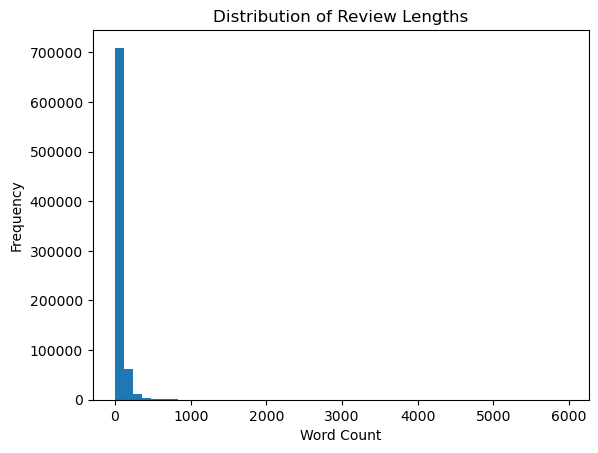

In [144]:
df["word_count"].plot(kind="hist", bins=50)
plt.xlabel("Word Count")
plt.title("Distribution of Review Lengths")
plt.show()


The review length distribution is right-skewed, with most reviews being short and a small number of very long reviews. This highlights the presence of outliers and informed the decision to apply minimal preprocessing without truncating reviews.


## Text Cleaning ##

In [148]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-z\s]", "", text)  # removes numbers & punctuation
    text = re.sub(r"\s+", " ", text).strip()
    return text

In [150]:
df["clean_text"] = df["review_body"].apply(clean_text)

Minimal preprocessing is used since TF-IDF models handle sparsity well.

## Feature Construction ##

In [154]:
df["text"] = df["review_headline"] + " " + df["clean_text"]


This would be X

## Train-Test Split ##

In [158]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df["text"],
    df["sentiment"],
    test_size=0.2,
    stratify=df["sentiment"],
    random_state=42
)


Stratified sampling preserves class proportions.

## Save cleaned data

In [164]:
df.to_csv("clean_reviews.csv", index=False)


In [166]:
X_train.to_csv("X_train.csv", index=False)
X_test.to_csv("X_test.csv", index=False)
y_train.to_csv("y_train.csv", index=False)
y_test.to_csv("y_test.csv", index=False)


The cleaned dataset was saved to disk to ensure reproducibility and allow reuse across modeling experiments.

## Data Wrangling & Exploratory Data Analysis Summary

- Removed rows with missing review text or star ratings, as they cannot be used for supervised learning.
- Created sentiment labels (positive, neutral, negative) from star ratings.
- Identified class imbalance, with positive reviews dominating the dataset.
- Found that negative reviews are longer on average, suggesting more detailed feedback.
- Performed minimal text preprocessing to preserve sentiment-related information.
